# Business Problem

* To analyze global population trends using historical data and predict future population growth, helping governments, organizations, and planners prepare for demographic changes.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [4]:
df = pd.read_csv('world_population.csv')

# Basic Checks

In [5]:
# Display the first few rows
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [5]:
# Diplay last few rows
df.tail()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25
233,74,ZWE,Zimbabwe,Harare,Africa,16320537,15669666,14154937,12839771,11834676,10113893,7049926,5202918,390757,41.7665,1.0204,0.20


In [6]:
# Check column datatypes and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [7]:
# Checking shape
df.shape

(234, 17)

In [8]:
# Checking for missing values
df.isnull().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [9]:
# Summary statistics for numerical columns
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


# Exploratory Data Analysis

## Univariate Analysis

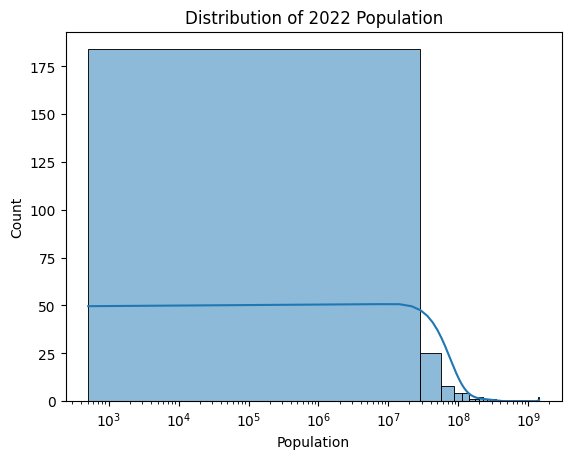

In [6]:
# Population (2022) Distribution
sns.histplot(df['2022 Population'], bins=50, kde=True)
plt.title('Distribution of 2022 Population')
plt.xlabel('Population')
plt.ylabel('Count')
plt.xscale('log')  # Because of skewed population sizes
plt.show()

* The population distribution is highly skewed. A few countries (like India and China) dominate in size, while many countries have populations below 10 million.



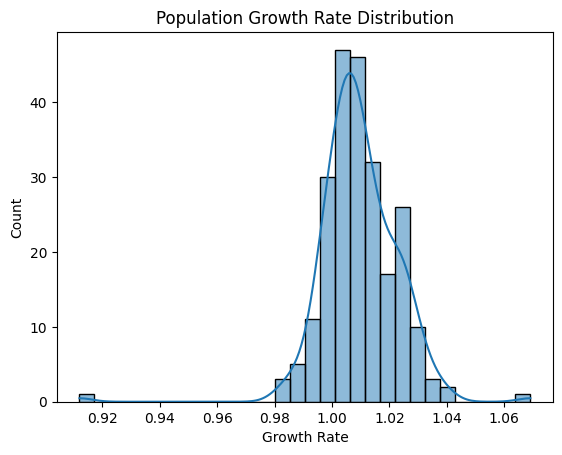

In [7]:
# Growth Rate Distribution
sns.histplot(df['Growth Rate'], bins=30, kde=True)
plt.title('Population Growth Rate Distribution')
plt.xlabel('Growth Rate')
plt.show()

* Most countries have growth rates between 0.5% and 2%, but a few (especially in Africa) have much higher growth.


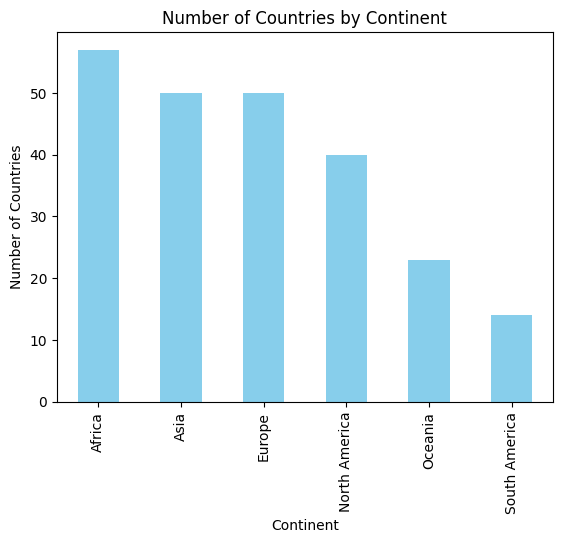

In [8]:
# Continent-wise Country Count
df['Continent'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Countries by Continent')
plt.ylabel('Number of Countries')
plt.show()

* Africa and Asia have the most countries in the dataset.

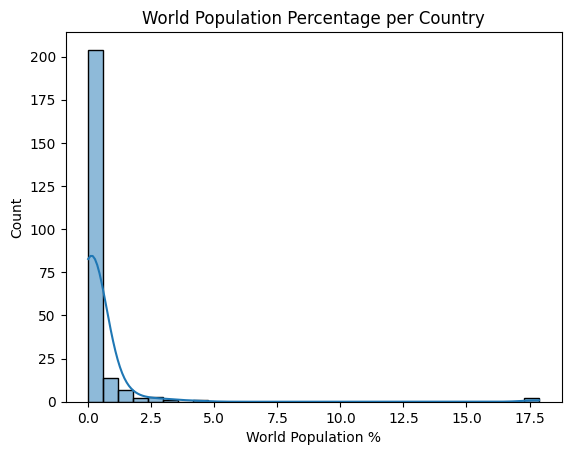

In [9]:
# World Population Percentage
sns.histplot(df['World Population Percentage'], bins=30, kde=True)
plt.title('World Population Percentage per Country')
plt.xlabel('World Population %')
plt.show()

* Most countries contribute a very small fraction (<1%) to the world population.

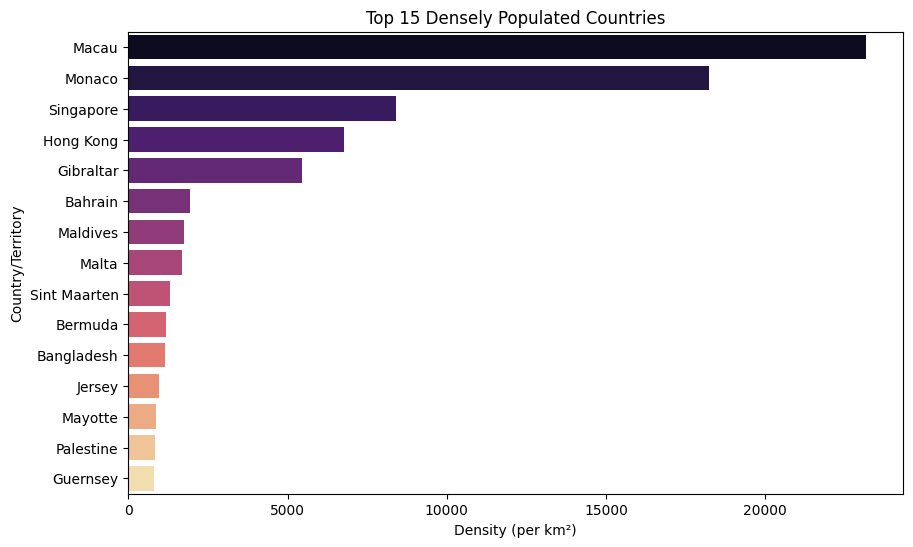

In [10]:
# Top 15 Densely Populated Countries
top_dense = df.sort_values('Density (per km²)', ascending=False).head(15)
plt.figure(figsize=(10,6))
sns.barplot(x='Density (per km²)', y='Country/Territory', data=top_dense, palette='magma')
plt.title('Top 15 Densely Populated Countries')
plt.show()

## Bivariate Analysis

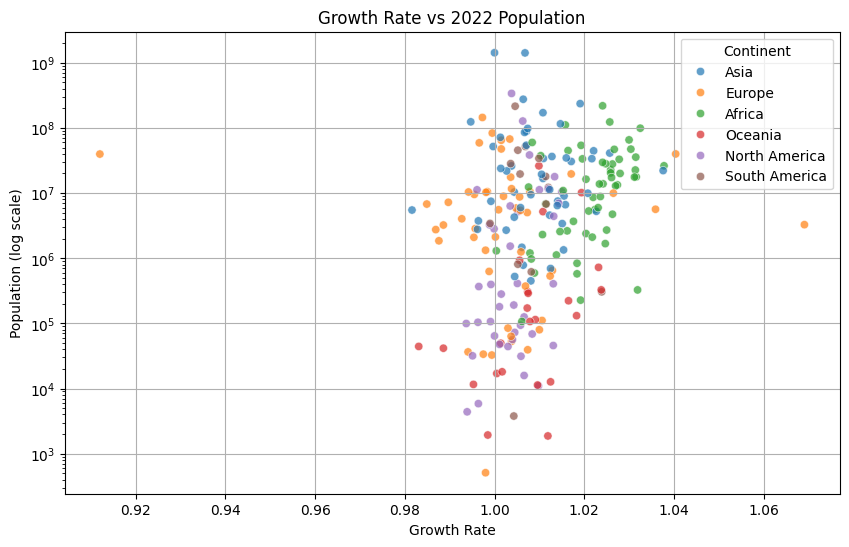

In [11]:
# Population (2022) vs. Growth Rate
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Growth Rate', y='2022 Population', hue='Continent', alpha=0.7)
plt.title('Growth Rate vs 2022 Population')
plt.yscale('log')
plt.xlabel('Growth Rate')
plt.ylabel('Population (log scale)')
plt.grid(True)
plt.show()

* African countries tend to have higher growth rates but smaller current populations.

* Asian countries (India, China) dominate with population but have stabilizing growth.



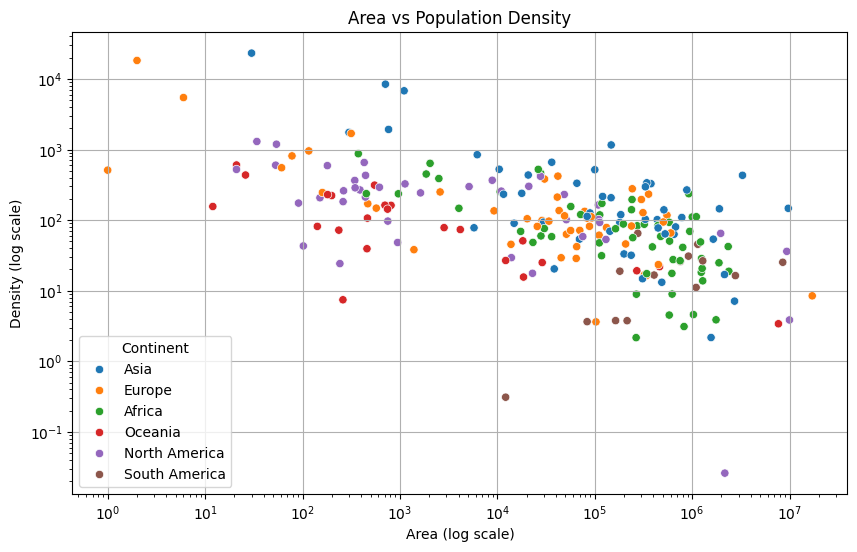

In [12]:
#  Area vs. Density
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Area (km²)', y='Density (per km²)', hue='Continent')
plt.xscale('log')
plt.yscale('log')
plt.title('Area vs Population Density')
plt.xlabel('Area (log scale)')
plt.ylabel('Density (log scale)')
plt.grid(True)
plt.show()

* Very small countries (Monaco, Singapore) show extreme density.

* Larger countries (Russia, Canada) have low density despite their size.



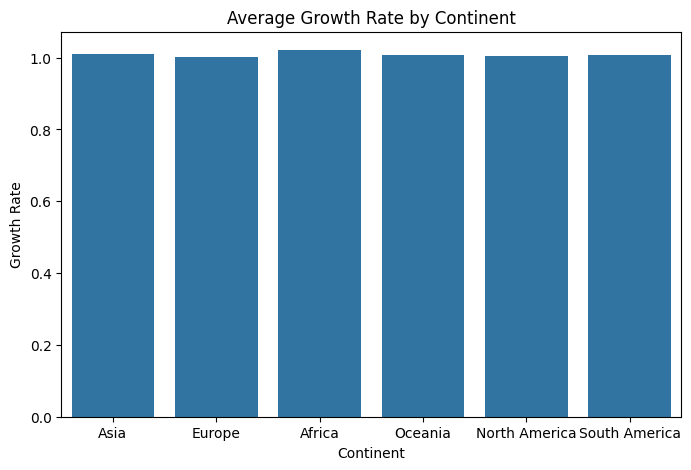

In [13]:
# Continent-wise Average Growth Rate
plt.figure(figsize=(8,5))
sns.barplot(x='Continent', y='Growth Rate', data=df, ci=None)
plt.title('Average Growth Rate by Continent')
plt.show()

* Africa has the highest average growth rate.

* Europe has the lowest — many countries are seeing near-zero or negative growth.

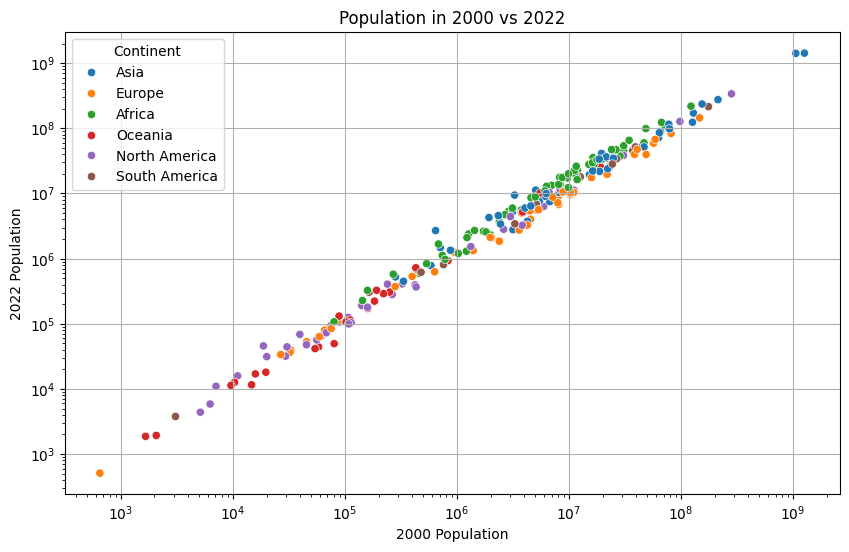

In [14]:
# Population in 2000 vs 2022
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='2000 Population', y='2022 Population', hue='Continent')
plt.xscale('log')
plt.yscale('log')
plt.title('Population in 2000 vs 2022')
plt.xlabel('2000 Population')
plt.ylabel('2022 Population')
plt.grid(True)
plt.show()

# Multivariate Analysis

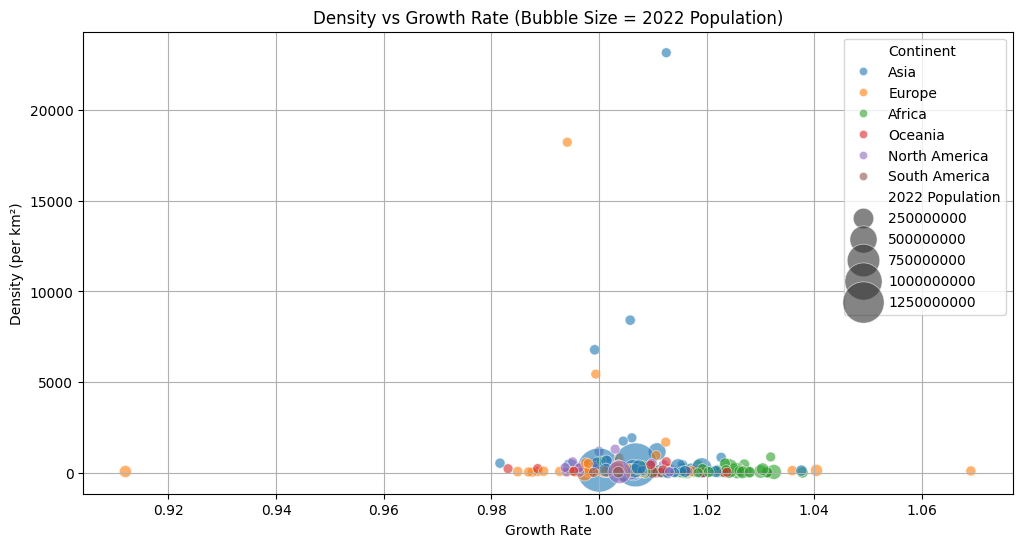

In [15]:
# Density vs Growth Rate vs Population Size
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Growth Rate', y='Density (per km²)', size='2022 Population', hue='Continent', sizes=(50, 1000), alpha=0.6)
plt.title('Density vs Growth Rate (Bubble Size = 2022 Population)')
plt.grid(True)
plt.show()

* Countries with high population + high growth are mainly in Asia and Africa.

* Low-density + high-growth zones indicate potential urban sprawl.


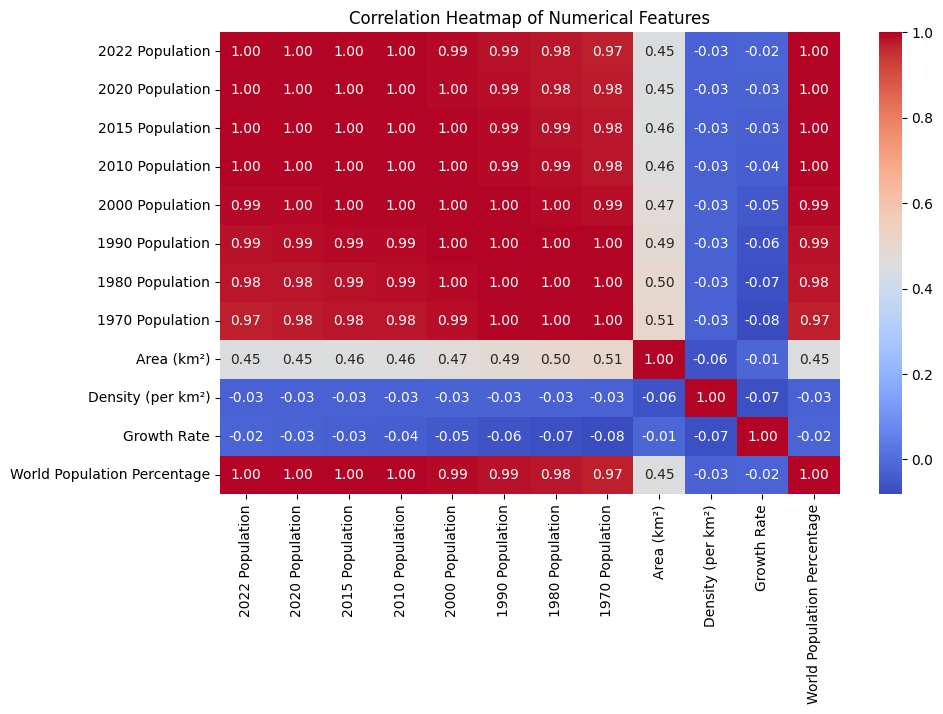

In [16]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
num_cols = df.select_dtypes(include='number').drop(columns=['Rank'])
corr_matrix = num_cols.corr()

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

* High positive correlation between population values across years (as expected).

* Growth Rate is not highly correlated with Population or Area → independent factor.


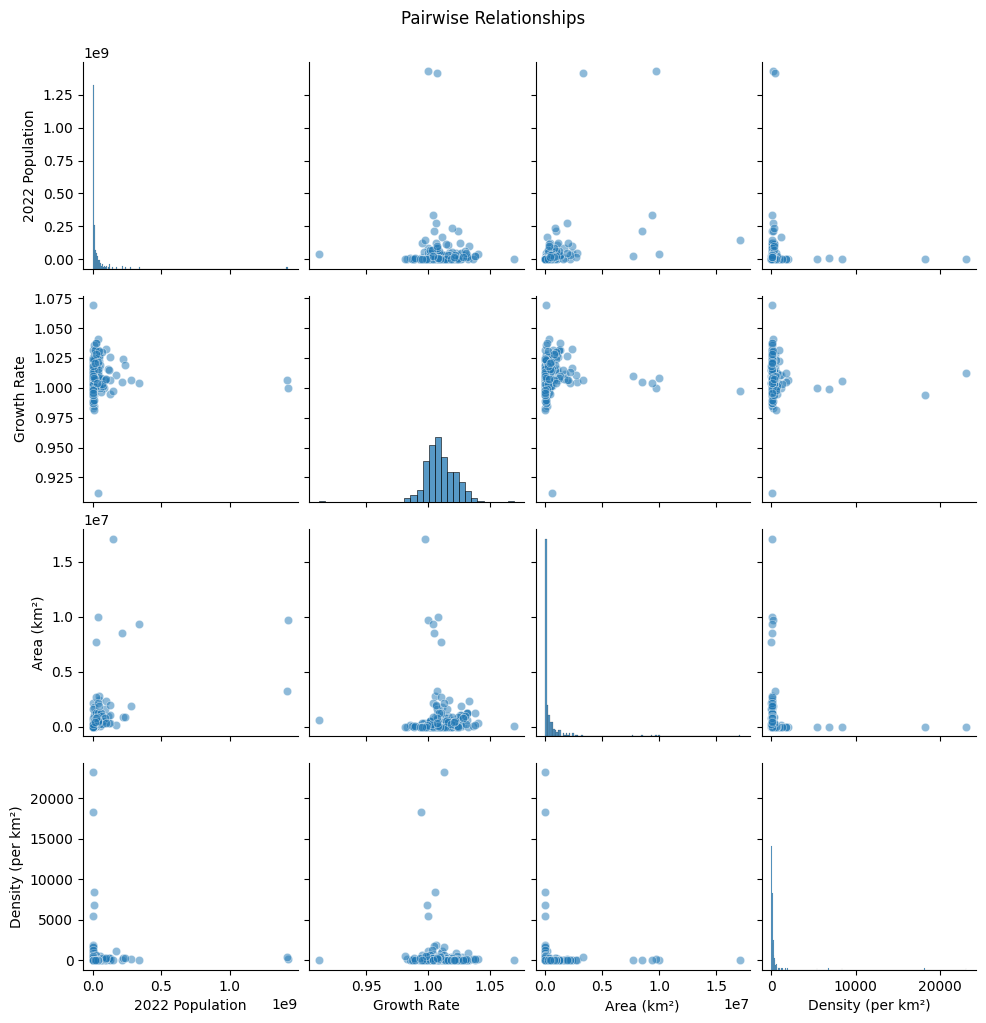

In [17]:
# Paiprplot
sns.pairplot(df[['2022 Population', 'Growth Rate', 'Area (km²)', 'Density (per km²)']], kind='scatter', plot_kws={'alpha':0.5})
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

* Negative relation between Area and Density.

* Weak relation between Growth Rate and Density.

* Population grows consistently regardless of area.



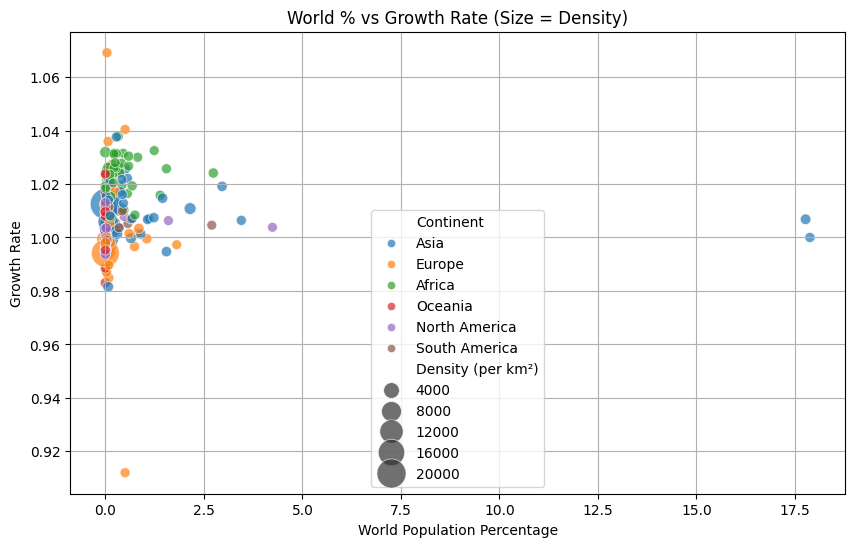

In [18]:
# Population % of World vs Growth Rate & Density
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='World Population Percentage', y='Growth Rate', size='Density (per km²)', hue='Continent', sizes=(50,500), alpha=0.7)
plt.title('World % vs Growth Rate (Size = Density)')
plt.grid(True)
plt.show()

* High world population share with low growth is visible for China and India.

* Countries with high growth often have very low world share, suggesting developing population booms.

# Data Preprocessing

## Handling Missing Values

In [19]:
df.isnull().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

## Handling Outliers

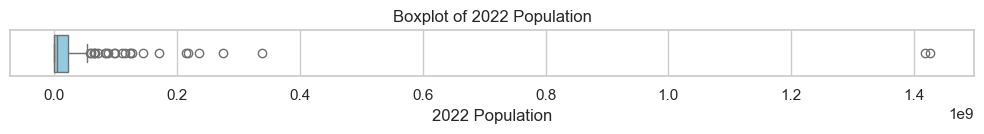

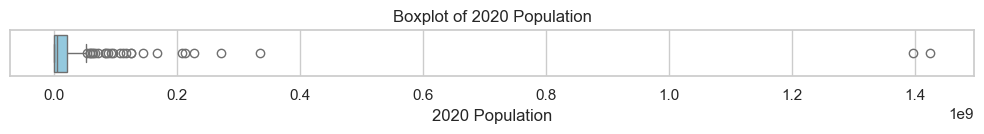

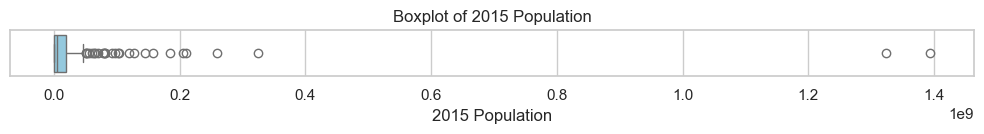

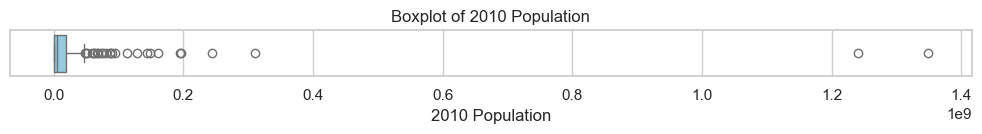

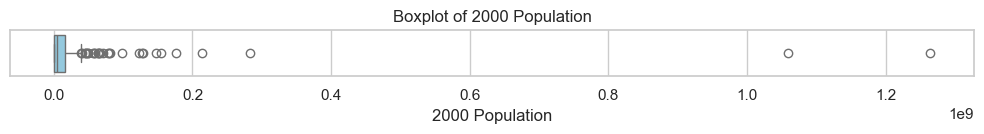

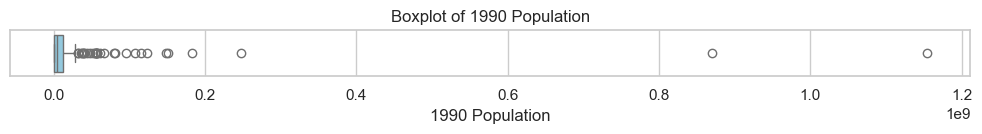

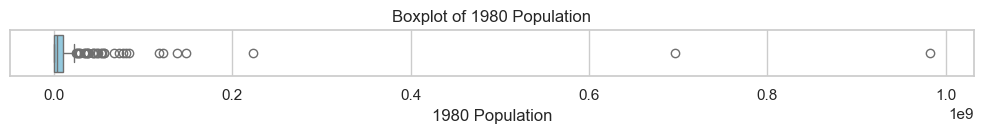

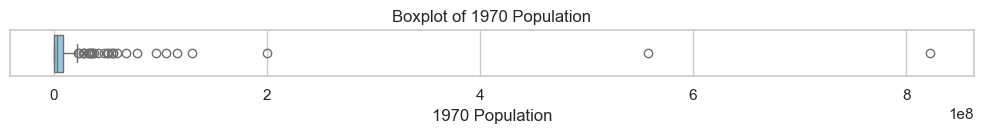

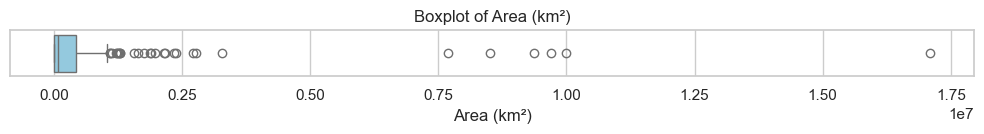

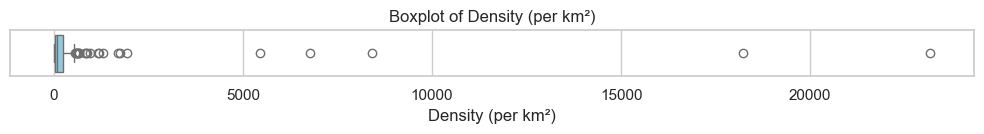

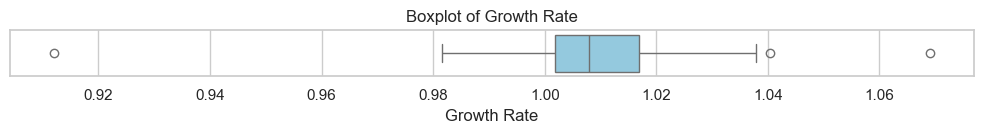

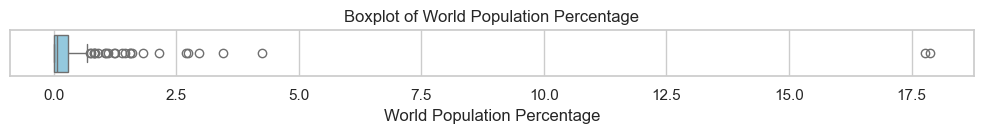

In [20]:
# Select numerical columns for boxplots
num_cols = [
    '2022 Population', '2020 Population', '2015 Population', '2010 Population',
    '2000 Population', '1990 Population', '1980 Population', '1970 Population',
    'Area (km²)', 'Density (per km²)', 'Growth Rate', 'World Population Percentage'
]

# Set style
sns.set(style="whitegrid")

# Plot boxplots
for col in num_cols:
    plt.figure(figsize=(10, 1.5))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [21]:
def cap_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower, upper=upper)
    return df

# Apply to all relevant columns
for col in num_cols:
    df = cap_outliers_iqr(df, col)

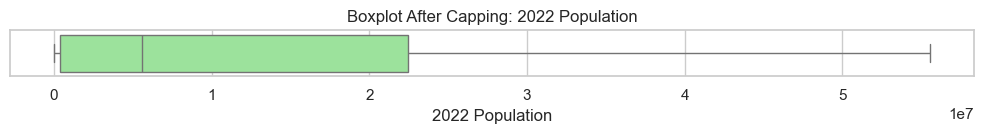

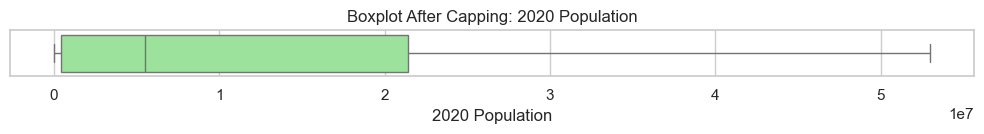

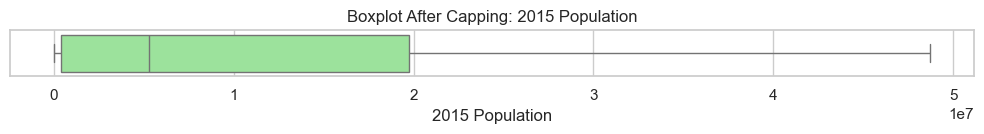

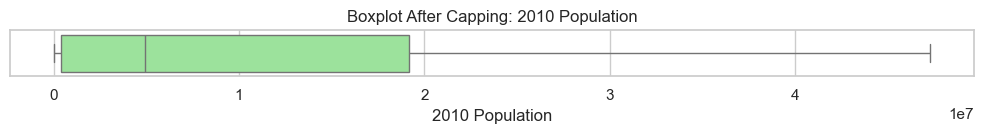

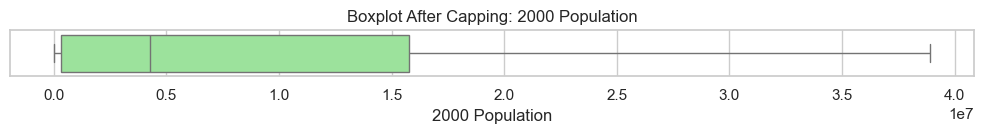

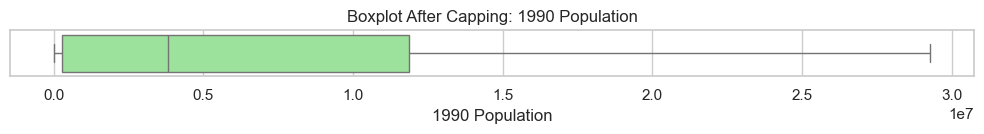

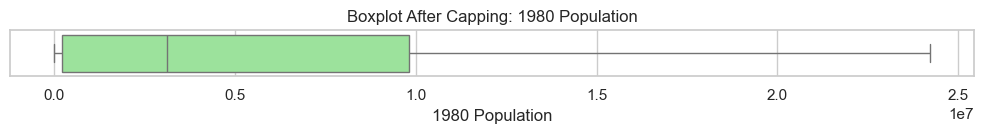

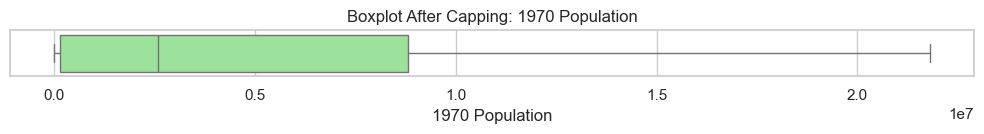

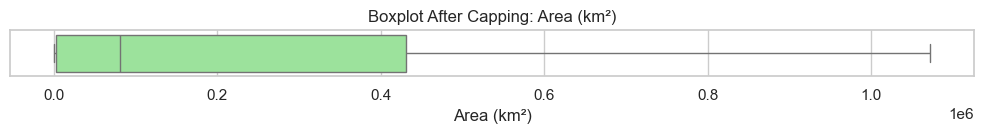

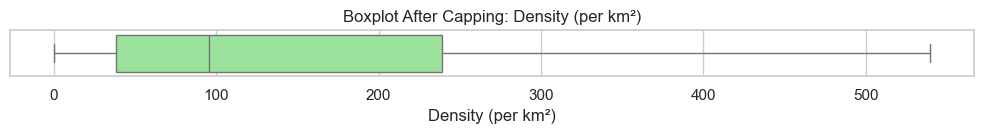

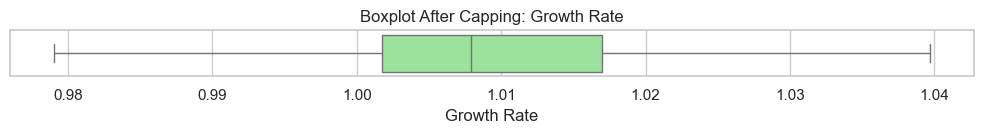

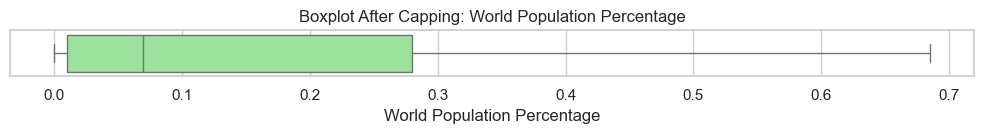

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots after capping
for col in num_cols:
    plt.figure(figsize=(10, 1.5))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot After Capping: {col}', fontsize=12)
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

## Categorical to Numerical

In [23]:
from sklearn.preprocessing import LabelEncoder

# Label Encode categorical columns
le = LabelEncoder()
df['Continent_encoded'] = le.fit_transform(df['Continent'])
df['Country_encoded'] = le.fit_transform(df['Country/Territory'])
df['Capital_encoded'] = le.fit_transform(df['Capital'])

In [24]:
df.drop(['Continent', 'Country/Territory', 'Capital'], axis=1, inplace=True)

## Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns (excluding categorical encodings)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Apply Standard Scaling
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

# Feature Engineering

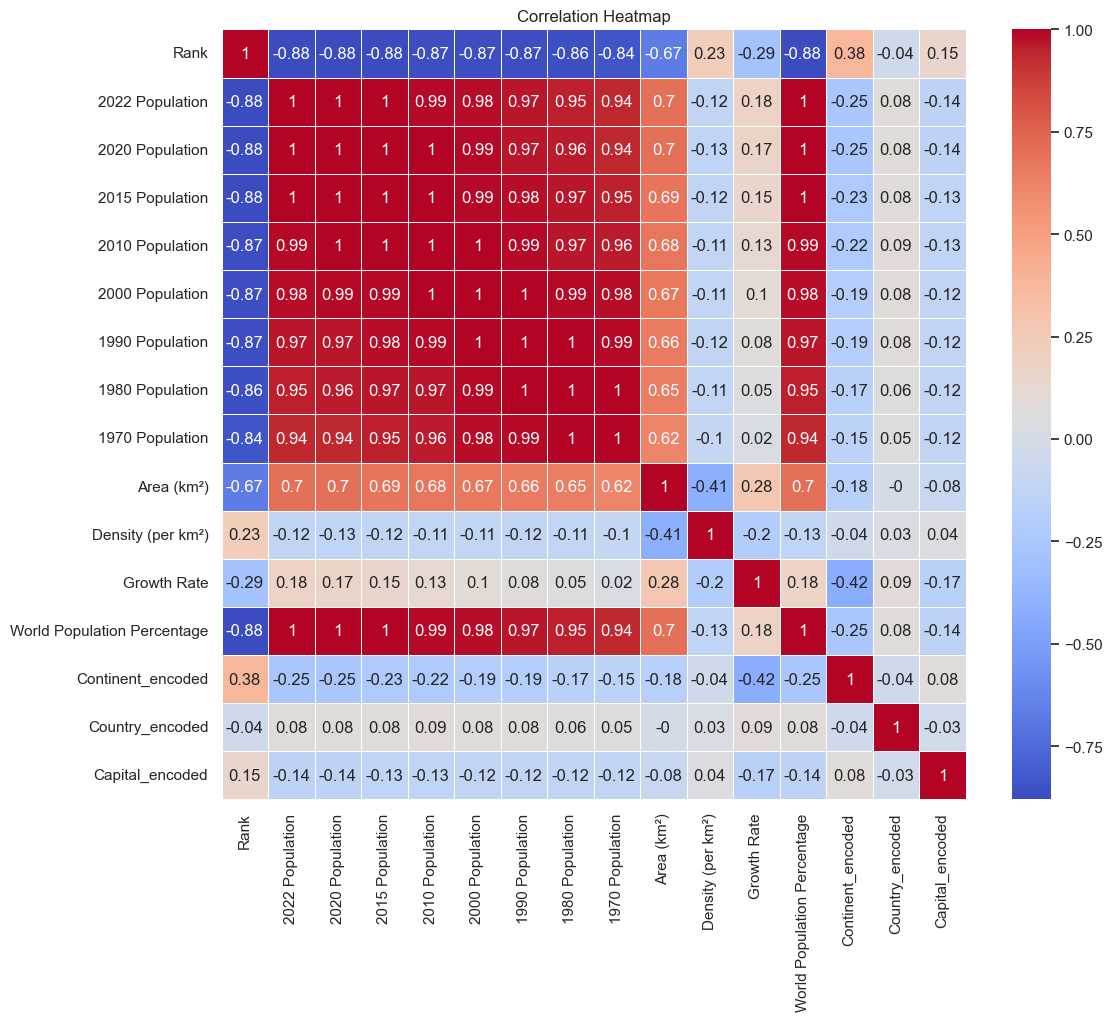

In [26]:
# Keep only numeric columns for correlation
numeric_df = df_scaled.select_dtypes(include=['number'])

# Now compute the correlation
corr_matrix = numeric_df.corr().round(2)

# Display the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [29]:
## Highly Correlated Feature Pairs
# Identify highly correlated features
threshold = 0.85
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)

# Filter only strong correlations (excluding self-correlations)
strong_corrs = corr_pairs[(corr_pairs < 1.0) & (corr_pairs > threshold)]
strong_corrs

1990 Population  2010 Population    0.99
1980 Population  2000 Population    0.99
2000 Population  1980 Population    0.99
2022 Population  2010 Population    0.99
2000 Population  2015 Population    0.99
                                    ... 
1990 Population  Rank               0.87
2010 Population  Rank               0.87
Rank             2000 Population    0.87
1980 Population  Rank               0.86
Rank             1980 Population    0.86
Length: 64, dtype: float64

In [30]:
columns_to_drop = [
    'Rank', 'CCA3', '2020 Population', '2015 Population', '2010 Population',
    '2000 Population', '1990 Population', '1980 Population', '1970 Population',
    'Country_encoded', 'Capital_encoded'
]

df_final = df.drop(columns=columns_to_drop)

# Model Creation 

In [32]:
from sklearn.model_selection import train_test_split

# Feature matrix (X) and target vector (y)
X = df[['2022 Population', 'Area (km²)', 'Density (per km²)', 'World Population Percentage', 'Continent_encoded']]
y = df['Growth Rate']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (187, 5)
X_test shape: (47, 5)
y_train shape: (187,)
y_test shape: (47,)


# Machine Learning Models

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 0.00013694784486444316
MAE: 0.009228623667329336
R2 Score: 0.11792263319569518


In [35]:
from sklearn.model_selection import GridSearchCV

params = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

grid_lr = GridSearchCV(LinearRegression(), params, cv=5)
grid_lr.fit(X_train, y_train)

y_pred = grid_lr.predict(X_test)
print("Best Params:", grid_lr.best_params_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Best Params: {'fit_intercept': True, 'normalize': False}
MSE: 0.00013694784486444316
MAE: 0.009228623667329336
R2 Score: 0.11792263319569518


In [36]:
from sklearn.model_selection import cross_val_score
import numpy as np

lr = LinearRegression()
mse = -cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
mae = -cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=5)
r2 = cross_val_score(lr, X, y, scoring='r2', cv=5)

print("Avg MSE:", np.mean(mse))
print("Avg MAE:", np.mean(mae))
print("Avg R2 Score:", np.mean(r2))

Avg MSE: 0.00010319714282209834
Avg MAE: 0.007931634535470921
Avg R2 Score: 0.19746653602929973


# Decision Tree Regressor

In [37]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 0.0002793443683510627
MAE: 0.011236702127659565
R2 Score: -0.7992495253256287


In [38]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(DecisionTreeRegressor(), params, cv=5)
grid_dt.fit(X_train, y_train)

y_pred = grid_dt.predict(X_test)
print("Best Params:", grid_dt.best_params_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Best Params: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10}
MSE: 0.00010361469173332599
MAE: 0.007153774161351583
R2 Score: 0.33262057145302426


In [39]:
dt = DecisionTreeRegressor()
mse = -cross_val_score(dt, X, y, scoring='neg_mean_squared_error', cv=5)
mae = -cross_val_score(dt, X, y, scoring='neg_mean_absolute_error', cv=5)
r2 = cross_val_score(dt, X, y, scoring='r2', cv=5)

print("Avg MSE:", np.mean(mse))
print("Avg MAE:", np.mean(mae))
print("Avg R2 Score:", np.mean(r2))

Avg MSE: 0.00017816572216119278
Avg MAE: 0.009375136447733572
Avg R2 Score: -0.46423310727936906


# Random Forest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 0.0001300397378660254
MAE: 0.007661146276595813
R2 Score: 0.16241756363288695


In [41]:
params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestRegressor(), params, cv=3)
grid_rf.fit(X_train, y_train)

y_pred = grid_rf.predict(X_test)
print("Best Params:", grid_rf.best_params_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Best Params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
MSE: 0.00010630816348675865
MAE: 0.007296646688766399
R2 Score: 0.3152719926989638


In [42]:
rf = RandomForestRegressor()
mse = -cross_val_score(rf, X, y, scoring='neg_mean_squared_error', cv=5)
mae = -cross_val_score(rf, X, y, scoring='neg_mean_absolute_error', cv=5)
r2 = cross_val_score(rf, X, y, scoring='r2', cv=5)

print("Avg MSE:", np.mean(mse))
print("Avg MAE:", np.mean(mae))
print("Avg R2 Score:", np.mean(r2))

Avg MSE: 0.00010282525748892765
Avg MAE: 0.00742812046715996
Avg R2 Score: 0.20580212531467793


#  Gradient Boosting Regressor

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 0.00015916336436873604
MAE: 0.008831352940904412
R2 Score: -0.025166927402597628


In [44]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

grid_gbr = GridSearchCV(GradientBoostingRegressor(), params, cv=5)
grid_gbr.fit(X_train, y_train)
y_pred = grid_gbr.predict(X_test)

print("Best Params:", grid_gbr.best_params_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
MSE: 0.00011451151103704153
MAE: 0.0077693548300309485
R2 Score: 0.26243445288008915


In [45]:
gbr = GradientBoostingRegressor()
mse = -cross_val_score(gbr, X, y, scoring='neg_mean_squared_error', cv=5)
mae = -cross_val_score(gbr, X, y, scoring='neg_mean_absolute_error', cv=5)
r2 = cross_val_score(gbr, X, y, scoring='r2', cv=5)

print("Avg MSE:", np.mean(mse))
print("Avg MAE:", np.mean(mae))
print("Avg R2 Score:", np.mean(r2))

Avg MSE: 0.00010619012143038308
Avg MAE: 0.0076162370489250035
Avg R2 Score: 0.1807632679395892


# XGBoost Regressor

In [46]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 0.00015597275040334666
MAE: 0.00823718324417762
R2 Score: -0.004616269100048198


In [47]:
params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

grid_xgb = GridSearchCV(XGBRegressor(), params, cv=5)
grid_xgb.fit(X_train, y_train)
y_pred = grid_xgb.predict(X_test)

print("Best Params:", grid_xgb.best_params_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
MSE: 0.00013782801779829669
MAE: 0.00815009008569919
R2 Score: 0.11225346312153717


In [48]:
xgb = XGBRegressor()
mse = -cross_val_score(xgb, X, y, scoring='neg_mean_squared_error', cv=5)
mae = -cross_val_score(xgb, X, y, scoring='neg_mean_absolute_error', cv=5)
r2 = cross_val_score(xgb, X, y, scoring='r2', cv=5)

print("Avg MSE:", np.mean(mse))
print("Avg MAE:", np.mean(mae))
print("Avg R2 Score:", np.mean(r2))


Avg MSE: 0.00012883857642144594
Avg MAE: 0.008207637954830125
Avg R2 Score: -0.0141733454109239


# Support Vector Regressor (SVR)

In [49]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 0.00015526770611702098
MAE: 0.01010212765957445
R2 Score: -7.50979105479388e-05


In [50]:
params = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2]
}

grid_svr = GridSearchCV(SVR(), params, cv=5)
grid_svr.fit(X_train, y_train)
y_pred = grid_svr.predict(X_test)

print("Best Params:", grid_svr.best_params_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Best Params: {'C': 0.1, 'epsilon': 0.1, 'kernel': 'rbf'}
MSE: 0.00015526770611702098
MAE: 0.01010212765957445
R2 Score: -7.50979105479388e-05


In [51]:
svr = SVR()
mse = -cross_val_score(svr, X, y, scoring='neg_mean_squared_error', cv=5)
mae = -cross_val_score(svr, X, y, scoring='neg_mean_absolute_error', cv=5)
r2 = cross_val_score(svr, X, y, scoring='r2', cv=5)

print("Avg MSE:", np.mean(mse))
print("Avg MAE:", np.mean(mae))
print("Avg R2 Score:", np.mean(r2))

Avg MSE: 0.0001297454396464499
Avg MAE: 0.009108244680851054
Avg R2 Score: -0.0045682757107119885


# K-Nearest Neighbors Regressor

In [52]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 0.00015888163005319078
MAE: 0.009764468085106387
R2 Score: -0.023352284291999315


In [53]:
params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

grid_knn = GridSearchCV(KNeighborsRegressor(), params, cv=5)
grid_knn.fit(X_train, y_train)
y_pred = grid_knn.predict(X_test)

print("Best Params:", grid_knn.best_params_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Best Params: {'n_neighbors': 9, 'weights': 'uniform'}
MSE: 0.0001496168749999991
MAE: 0.009831914893617002
R2 Score: 0.0363217525611943


In [54]:
knn = KNeighborsRegressor()
mse = -cross_val_score(knn, X, y, scoring='neg_mean_squared_error', cv=5)
mae = -cross_val_score(knn, X, y, scoring='neg_mean_absolute_error', cv=5)
r2 = cross_val_score(knn, X, y, scoring='r2', cv=5)

print("Avg MSE:", np.mean(mse))
print("Avg MAE:", np.mean(mae))
print("Avg R2 Score:", np.mean(r2))

Avg MSE: 0.0001299262216240745
Avg MAE: 0.00897333140610545
Avg R2 Score: -0.020243680835901244


# Ridge Regression

In [55]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 0.00013514025978064376
MAE: 0.009188213272121775
R2 Score: 0.1295652398578938


In [56]:
params = {'alpha': [0.1, 1, 10, 100]}
grid_ridge = GridSearchCV(Ridge(), params, cv=5)
grid_ridge.fit(X_train, y_train)
y_pred = grid_ridge.predict(X_test)

print("Best Params:", grid_ridge.best_params_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Best Params: {'alpha': 10}
MSE: 0.0001345443857216413
MAE: 0.00916802690210673
R2 Score: 0.13340324856428976


In [57]:
ridge = Ridge()
mse = -cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=5)
mae = -cross_val_score(ridge, X, y, scoring='neg_mean_absolute_error', cv=5)
r2 = cross_val_score(ridge, X, y, scoring='r2', cv=5)

print("Avg MSE:", np.mean(mse))
print("Avg MAE:", np.mean(mae))
print("Avg R2 Score:", np.mean(r2))

Avg MSE: 0.0001027574477606505
Avg MAE: 0.008003308535184304
Avg R2 Score: 0.20233909828959168


# Lasso Regression

In [58]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 0.00013815837430432597
MAE: 0.009656446219031443
R2 Score: 0.11012564579638373


In [59]:
params = {'alpha': [0.01, 0.1, 1, 10]}
grid_lasso = GridSearchCV(Lasso(), params, cv=5)
grid_lasso.fit(X_train, y_train)
y_pred = grid_lasso.predict(X_test)

print("Best Params:", grid_lasso.best_params_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Best Params: {'alpha': 10}
MSE: 0.00013819275613758487
MAE: 0.009658891429125167
R2 Score: 0.10990419333777124


In [60]:
lasso = Lasso()
mse = -cross_val_score(lasso, X, y, scoring='neg_mean_squared_error', cv=5)
mae = -cross_val_score(lasso, X, y, scoring='neg_mean_absolute_error', cv=5)
r2 = cross_val_score(lasso, X, y, scoring='r2', cv=5)

print("Avg MSE:", np.mean(mse))
print("Avg MAE:", np.mean(mae))
print("Avg R2 Score:", np.mean(r2))

Avg MSE: 0.00012189927632124938
Avg MAE: 0.008845887007569686
Avg R2 Score: 0.05631563641033519


In [61]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# List of models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}

# Results list
results = []

# Train, Predict & Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'MSE': round(mse, 2),
        'MAE': round(mae, 2),
        'R2 Score': round(r2, 4)
    })

# Display results in DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R2 Score', ascending=False).reset_index(drop=True)
print(results_df)

              Model  MSE   MAE  R2 Score
0      RandomForest  0.0  0.01    0.1444
1             Ridge  0.0  0.01    0.1296
2  LinearRegression  0.0  0.01    0.1179
3             Lasso  0.0  0.01    0.1101
4               SVR  0.0  0.01   -0.0001
5               KNN  0.0  0.01   -0.0234
6  GradientBoosting  0.0  0.01   -0.0251
7      DecisionTree  0.0  0.01   -0.6270


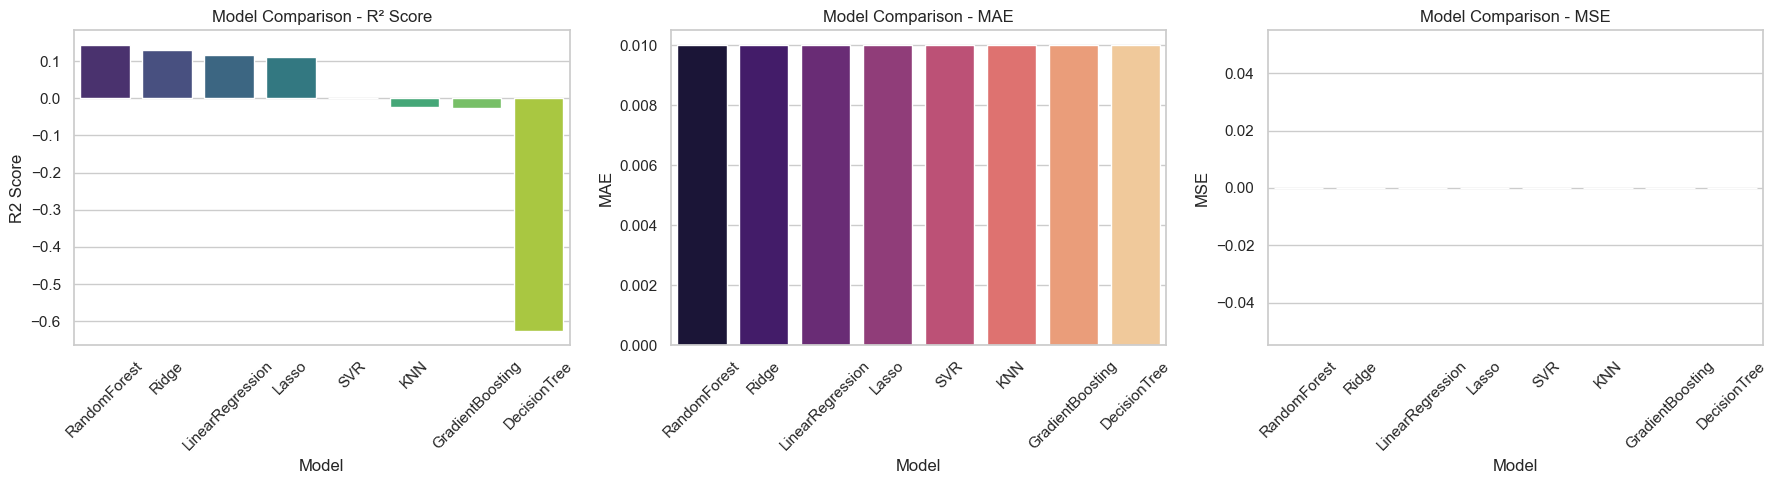

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))

# Plot 1: R² Score
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='R2 Score', data=results_df, palette='viridis')
plt.title('Model Comparison - R² Score')
plt.xticks(rotation=45)

# Plot 2: MAE
plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='MAE', data=results_df, palette='magma')
plt.title('Model Comparison - MAE')
plt.xticks(rotation=45)

# Plot 3: MSE
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='MSE', data=results_df, palette='plasma')
plt.title('Model Comparison - MSE')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Model Camparison Report

# ✅ 1. Random Forest Regressor
#### Why it worked:

* Captures non-linear relationships and interactions.

* Robust to outliers and feature scale.

#### Why still low R²:

* Target values are very close together (e.g., 0.04, 0.00, etc.).

* Limited predictive signal in features (all populations, densities, etc.).

# ✅ 2. Ridge, Lasso, Linear
#### Why they worked moderately:

* Good for structured, numeric data.

* Ridge controls multicollinearity well.

* Lasso can perform implicit feature selection.

# ❌ 3. SVR, KNN
#### Why they failed:

* SVR: Sensitive to scaling and needs well-separated target values.

* KNN: Assumes similar inputs yield similar outputs. Not true here due to target compression.

# ❌ 4. Gradient Boosting, Decision Tree
#### Why they failed:

* High complexity relative to target variance → overfitting.

* Not enough signal in the data for deep splits.

# Challenges Faced Report


* 📉 Very Small Target Values	World Population Percentage ranges between 0.00 and ~0.56 – causes low variance and model difficulty.


* 🔁 Multicollinearity	Population columns across years are highly correlated → redundant signal.


* ❌ Lack of Rich Features	Only numeric country stats; lacks demographic, economic, or behavioral data that might explain population share.


* 🧱 Categorical Columns Now Encoded	Still, country/capital encoding doesn't provide real "context" → more like IDs.


# 🚀 Recommendations for Improvement
#### Transform Target Variable:

* Try log or Box-Cox transformation on World Population Percentage.

* Feature Engineering Ideas

* Use population growth % between years.

* Normalize population by area.


#### Create features like:

* Population Density Category (High/Med/Low)

* Growth Decade Rate

* Add External Data

* GDP, income, urbanization, fertility rate, life expectancy, etc.


#### Modeling Suggestions:

* Try Ensemble Stacking of top 3 models.

* Try XGBoost/LightGBM with proper tuning.